In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
gss_data = pd.read_stata('GSS2012merged_R5.dta', convert_categoricals=False)
gss_data.head()

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
0,2012,1,2.0,15.0,NaN,NaN,2.0,2.0,4800.0,7470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,2,2.0,30.0,NaN,NaN,2.0,2.0,2900.0,770.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,3,1.0,60.0,NaN,NaN,2.0,2.0,1320.0,6070.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,4,8.0,NaN,NaN,1.0,2.0,2.0,800.0,6990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,5,5.0,NaN,NaN,1.0,2.0,1.0,3800.0,9470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
gss_data.set_index('id')
gss_data.drop('id', 1, inplace=True)
gss_data.head()

/tmp/ipykernel_27763/3919949206.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  gss_data.drop('id', 1, inplace=True)


,year,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,marital,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
0,2012,2.0,15.0,NaN,NaN,2.0,2.0,4800.0,7470.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,2.0,30.0,NaN,NaN,2.0,2.0,2900.0,770.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,1.0,60.0,NaN,NaN,2.0,2.0,1320.0,6070.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,8.0,NaN,NaN,1.0,2.0,2.0,800.0,6990.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,5.0,NaN,NaN,1.0,2.0,1.0,3800.0,9470.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
gss_data.to_csv('GSS2012merged.csv')

/root/tutorial-env/lib/python3.10/site-packages/pandas/core/internals/blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


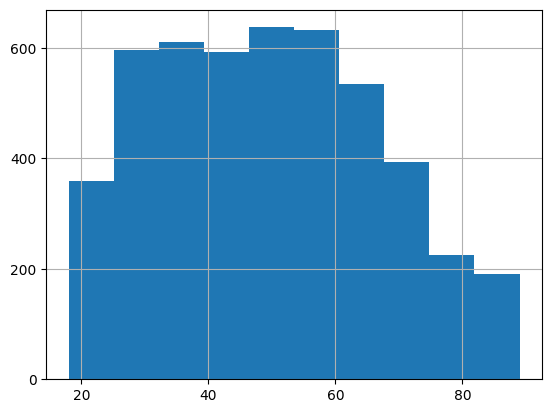

In [31]:
gss_data['age'].hist()
plt.locator_params(nbins=5)

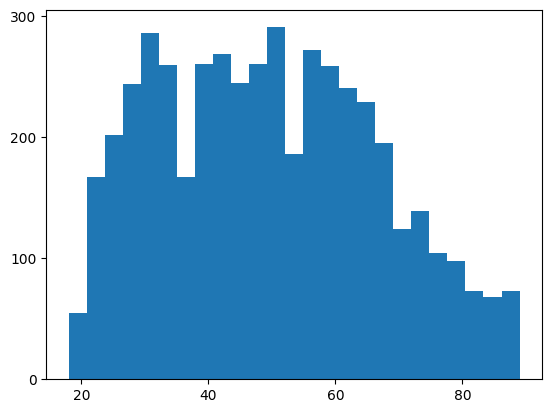

In [32]:
gss_data['age'].hist(bins=25)
plt.grid()
plt.locator_params(nbins=5)

In [33]:
inc_age = gss_data[['realrinc','age']].dropna()
inc_age.head(10)

,realrinc,age
2,58800.0,42.0
9,15925.0,28.0
11,3185.0,36.0
14,7962.5,52.0
15,26950.0,35.0
16,26950.0,36.0
17,22050.0,47.0
18,33075.0,55.0
22,33075.0,54.0
23,49000.0,45.0


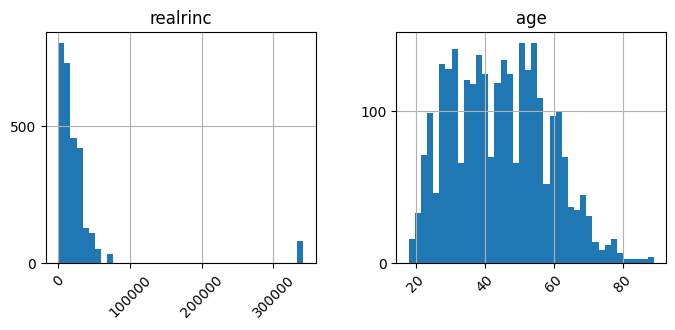

In [34]:
ax_list = inc_age.hist(bins=40, figsize=(8,3), xrot=45)
for ax in ax_list[0]:
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

In [35]:
inc_age[inc_age['realrinc'] > 3.0E5].count()

realrinc    80
age         80
dtype: int64

In [36]:
inc_age[inc_age['realrinc'] > 3.0E5].head(10)

,realrinc,age
42,341672.3793,51.0
43,341672.3793,57.0
44,341672.3793,44.0
47,341672.3793,68.0
54,341672.3793,46.0
126,341672.3793,53.0
241,341672.3793,61.0
261,341672.3793,55.0
263,341672.3793,43.0
401,341672.3793,37.0


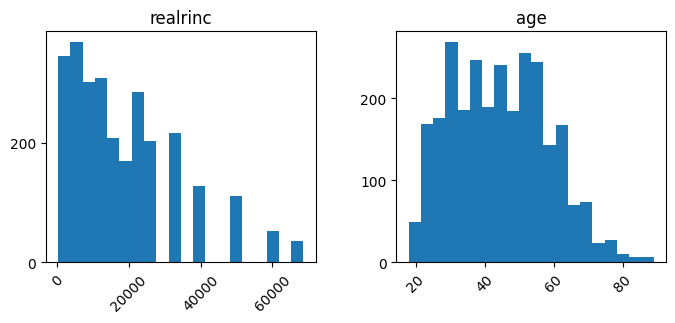

In [37]:
inc_age = gss_data[['realrinc','age']].dropna()
lowinc_age = inc_age[inc_age['realrinc'] <3.0E5]
ax_list = lowinc_age.hist(bins=20, figsize=(8,3), xrot=45)
for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x' ,nbins=6)
    ax.locator_params(axis='y' ,nbins=3)

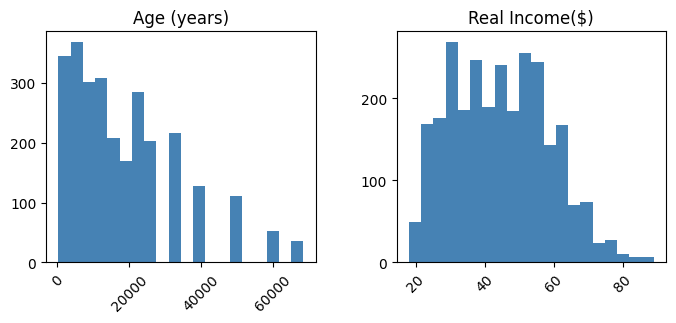

In [38]:
ax_list = lowinc_age.hist(bins=20, figsize=(8,3), xrot=45, color='SteelBlue')
ax1, ax2 = ax_list[0]
ax1.set_title('Age (years)')
ax2.set_title('Real Income($)')
for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=4)
    

Text(0.5, 0, 'Age (years)')

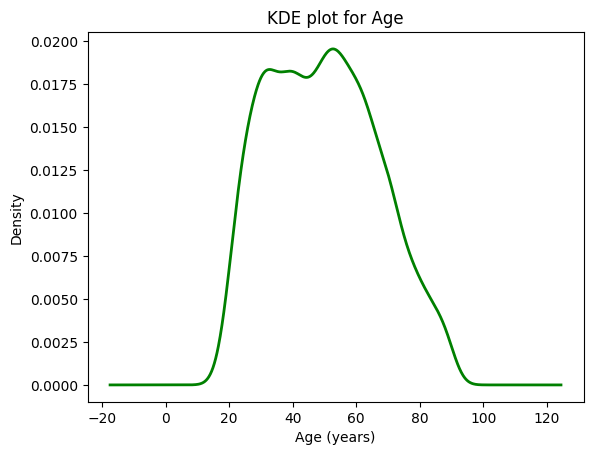

In [39]:
age = gss_data['age'].dropna()
age.plot(kind='kde', lw=2, color='green')
plt.title('KDE plot for Age')
plt.xlabel('Age (years)')

Text(0.5, 0, 'Age (years)')

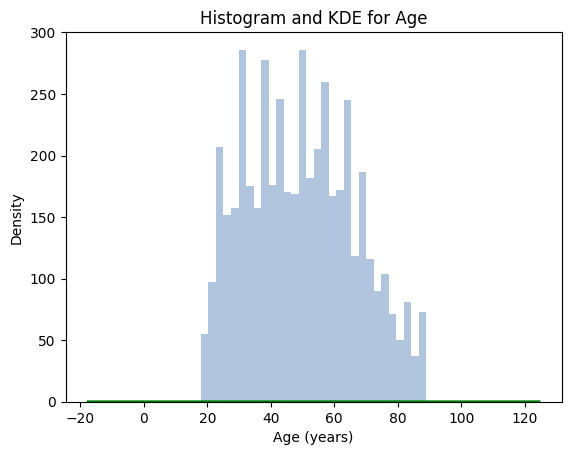

In [40]:
ax = age.hist(bins=30, color='LightSteelBlue')
age.plot(kind='kde', lw=2, color='Green', ax=ax)
plt.title('Histogram and KDE for Age')
plt.xlabel('Age (years)')

((array([-3.62347833, -3.38741543, -3.25727154, ...,  3.25727154,
          3.38741543,  3.62347833]),
  array([18., 18., 18., ..., 89., 89., 89.])),
 (16.994985855046277, 49.59467393583561, 0.9882188072238004))

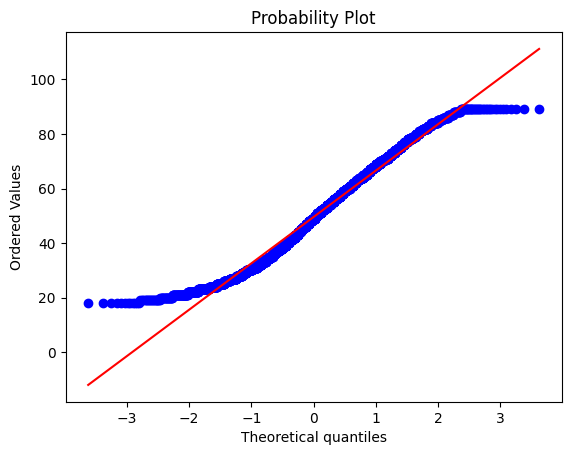

In [41]:
import scipy.stats as stats
stats.probplot(age, dist='norm', plot=plt)

In [42]:
inc = gss_data['realrinc'].dropna()
lowinc = inc[inc <3.0E5]
lowinc.describe()

count     2751.000000
mean     18582.194656
std      14841.581333
min        245.000000
25%       6737.500000
50%      15925.000000
75%      26950.000000
max      68600.000000
Name: realrinc, dtype: float64

In [43]:
lowinc.describe(percentiles=np.arange(0, 1.0, 0.1))

count     2751.000000
mean     18582.194656
std      14841.581333
min        245.000000
0%         245.000000
10%       2695.000000
20%       5512.500000
30%       9187.500000
40%      11637.500000
50%      15925.000000
60%      18375.000000
70%      22050.000000
80%      26950.000000
90%      40425.000000
max      68600.000000
Name: realrinc, dtype: float64

<AxesSubplot: >

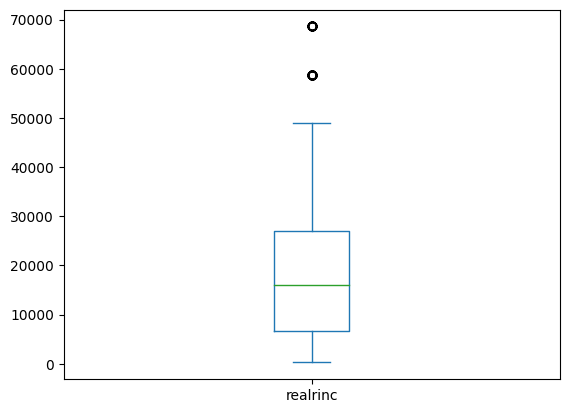

In [44]:
lowinc.plot(kind='box')

<AxesSubplot: >

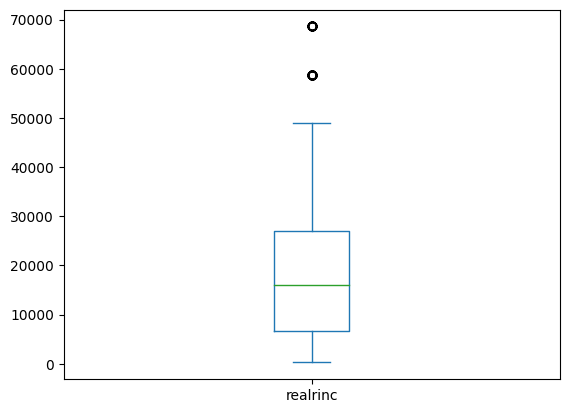

In [45]:
lowinc.plot.box()

<AxesSubplot: title={'center': 'realrinc'}, xlabel='sex'>

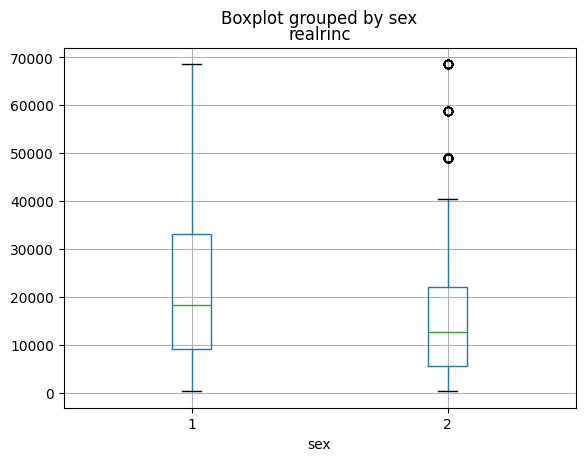

In [46]:
inc_gen = gss_data[['realrinc','sex']]
inc_gen = inc_gen[inc_gen['realrinc']<3.0E5]
inc_gen.boxplot(column='realrinc', by='sex')

In [47]:
from scipy.stats import linregress
hubble_data = pd.read_csv('hubble.csv')
#hubble_data.plot(kind='scatter', x='r', y='v')
rv = hubble_data.as_matrix(columns=['r','v'])
a, b, r, p, stderr = linregress(rv)
print(a, b, r, p, stderr)
                           

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

KeyError: 'r'

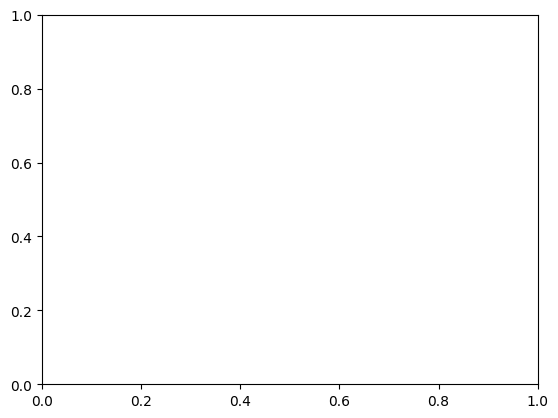

In [51]:
hubble_data.plot(kind='scatter', x='r', y='v')
rdata = hubble_data['r']
rmin, rmax = min(rdata), max(rdata)